In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [9]:
df = sns.load_dataset("anscombe")
df.head(5)

,dataset,x,y
0,I,10.0,8.04
1,I,8.0,6.95
2,I,13.0,7.58
3,I,9.0,8.81
4,I,11.0,8.33


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44 entries, 0 to 43
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dataset  44 non-null     object 
 1   x        44 non-null     float64
 2   y        44 non-null     float64
dtypes: float64(2), object(1)
memory usage: 1.2+ KB


In [11]:
def dataset_convertor(dataset):
    df = dataset
    if df=="I":
        return 1
    elif df=="II":
        return 2
    elif df=="III":
        return 3
    elif df=="IV":
        return 4
    else:
        return None

df["dataset"] = df["dataset"].apply(dataset_convertor)

In [13]:
df.sample(5)

,dataset,x,y
18,2,4.0,3.10
15,2,11.0,9.26
3,1,9.0,8.81
12,2,8.0,8.14
5,1,14.0,9.96


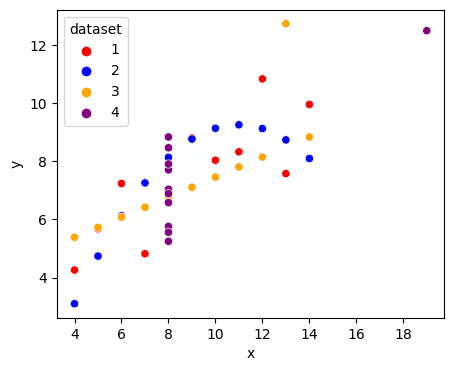

In [16]:
color_dic = {1:"red",2:"blue",3:"orange",4:"purple"}

plt.figure(figsize=(5,4))
sns.scatterplot(x=df["x"], y=df["y"], hue=df["dataset"], palette=color_dic)
plt.show()

<Axes: title={'center': 'KDE of Y'}, xlabel='y', ylabel='Density'>

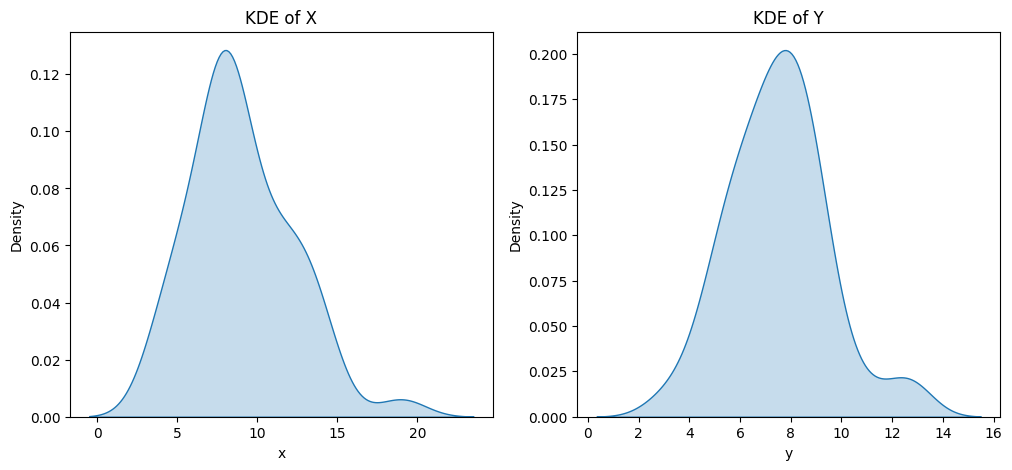

In [20]:
fig , (ax1,ax2) = plt.subplots(ncols=2, figsize=(12,5))

ax1.set_title("KDE of X")
sns.kdeplot(df["x"], ax=ax1, fill=True)

ax2.set_title("KDE of Y")
sns.kdeplot(df["y"], ax=ax2, fill=True)

In [21]:
from sklearn.model_selection import train_test_split

x = df.drop("dataset",axis=1)
y = df["dataset"]

x_train,x_test,y_train,y_test = train_test_split(x, y, test_size=0.20, random_state=0)

x_train.shape , x_test.shape

((35, 2), (9, 2))

## Normalization -->> MinMaxScaler

In [24]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(x_train)
x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [25]:
x_train_scaled

array([[0.2       , 0.34439834],
       [0.        , 0.23755187],
       [0.2       , 0.43153527],
       [0.26666667, 0.25518672],
       [0.6       , 0.46473029],
       [0.26666667, 0.39315353],
       [0.        , 0.        ],
       [0.46666667, 0.63900415],
       [0.4       , 0.45228216],
       [0.66666667, 0.5186722 ],
       [1.        , 0.97510373],
       [0.53333333, 0.80290456],
       [0.6       , 0.58506224],
       [0.66666667, 0.71161826],
       [0.13333333, 0.31431535],
       [0.06666667, 0.27282158],
       [0.33333333, 0.58817427],
       [0.26666667, 0.47821577],
       [0.        , 0.12033195],
       [0.26666667, 0.27593361],
       [0.26666667, 0.39937759],
       [0.46666667, 0.48858921],
       [0.26666667, 0.52282158],
       [0.26666667, 0.36099585],
       [0.6       , 1.        ],
       [0.13333333, 0.42946058],
       [0.26666667, 0.38070539],
       [0.26666667, 0.59543568],
       [0.06666667, 0.17012448],
       [0.53333333, 0.62551867],
       [0.

In [27]:
x_train_scaled_df = pd.DataFrame(x_train_scaled, columns=x_train.columns)
x_test_scaled_df = pd.DataFrame(x_test_scaled, columns=x_train.columns)

In [28]:
x_train_scaled_df.shape, x_test_scaled_df.shape

((35, 2), (9, 2))

In [29]:
x_train_scaled_df.head(3)

,x,y
0,0.2,0.344398
1,0.0,0.237552
2,0.2,0.431535


In [32]:
round(x_train_scaled_df.describe(), 1)

,x,y
count,35.0,35.0
mean,0.3,0.5
std,0.2,0.2
min,0.0,0.0
25%,0.2,0.3
50%,0.3,0.5
75%,0.5,0.6
max,1.0,1.0


In [34]:
round(x_train.describe(), 1)

,x,y
count,35.0,35.0
mean,8.9,7.5
std,3.3,2.1
min,4.0,3.1
25%,7.0,5.9
50%,8.0,7.5
75%,11.0,8.8
max,19.0,12.7


## Standardization

In [35]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(x_train)
x_train_scaled2 = scaler.transform(x_train)
x_test_scaled2 = scaler.transform(x_test)

In [36]:
x_train_scaled2

array([[-5.94436481e-01, -4.99090793e-01],
       [-1.51231634e+00, -9.92163500e-01],
       [-5.94436481e-01, -9.69732453e-02],
       [-2.88476528e-01, -9.10782568e-01],
       [ 1.24132324e+00,  5.62143919e-02],
       [-2.88476528e-01, -2.74096451e-01],
       [-1.51231634e+00, -2.08841253e+00],
       [ 6.29403333e-01,  8.60449487e-01],
       [ 3.23443380e-01, -1.23097208e-03],
       [ 1.54728319e+00,  3.05144302e-01],
       [ 3.07708296e+00,  2.41147431e+00],
       [ 9.35363287e-01,  1.61681345e+00],
       [ 1.24132324e+00,  6.11519577e-01],
       [ 1.54728319e+00,  1.19554744e+00],
       [-9.00396435e-01, -6.37917089e-01],
       [-1.20635639e+00, -8.29401636e-01],
       [ 1.74834259e-02,  6.25880918e-01],
       [-2.88476528e-01,  1.18446869e-01],
       [-1.51231634e+00, -1.53310734e+00],
       [-2.88476528e-01, -8.15040295e-01],
       [-2.88476528e-01, -2.45373769e-01],
       [ 6.29403333e-01,  1.66318006e-01],
       [-2.88476528e-01,  3.24292757e-01],
       [-2.

In [37]:
x_train_scaled2_df = pd.DataFrame(x_train_scaled2, columns=x_train.columns)

In [38]:
x_test_scaled2_df = pd.DataFrame(x_test_scaled2, columns=x_train.columns)

In [39]:
x_train_scaled2_df.describe()

,x,y
count,3.500000e+01,35.000000
mean,-4.916702e-17,0.000000
std,1.014599e+00,1.014599
min,-1.512316e+00,-2.088413
25%,-5.944365e-01,-0.726479
50%,-2.884765e-01,-0.001231
75%,6.294033e-01,0.618700
max,3.077083e+00,2.526365


## Classification Model using MinMaxScaler

In [42]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr_scaled = LogisticRegression()

lr.fit(x_train, y_train)
lr_scaled.fit(x_train_scaled_df, y_train)

LogisticRegression()

In [43]:
pred = lr.predict(x_test)
pred_scaled = lr_scaled.predict(x_test_scaled_df)

In [46]:
from sklearn.metrics import accuracy_score

print(round(accuracy_score(pred, y_test), 2))
print(round(accuracy_score(pred_scaled, y_test), 2))

0.0
0.11


## Classification model using Standardization

In [47]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr_scaled = LogisticRegression()

lr.fit(x_train, y_train)
lr_scaled.fit(x_train_scaled2_df, y_train)

LogisticRegression()

In [48]:
pred = lr.predict(x_test)
pred_scaled = lr_scaled.predict(x_test_scaled2_df)

In [49]:
from sklearn.metrics import accuracy_score

print(round(accuracy_score(pred, y_test), 2))
print(round(accuracy_score(pred_scaled, y_test), 2))

0.0
0.11


## See there is no change in data

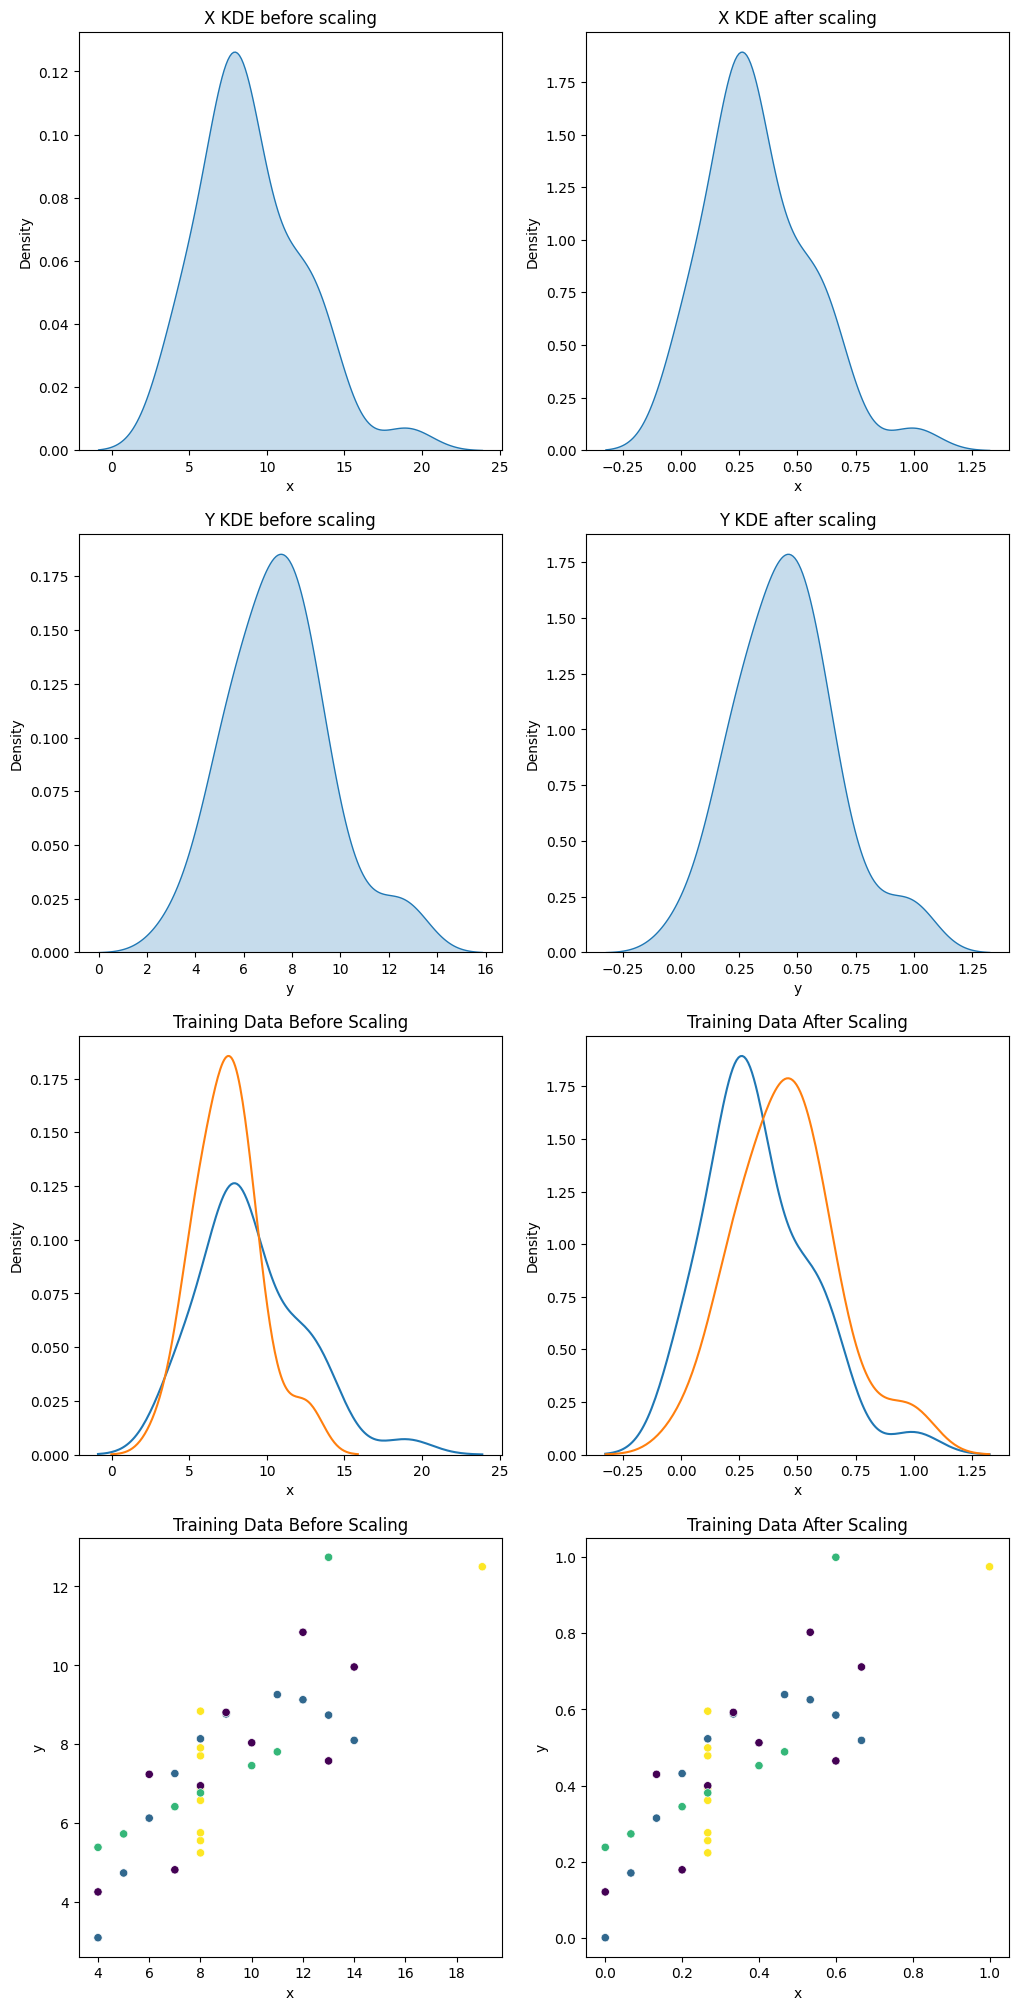

In [56]:
fig , axes = plt.subplots(nrows=4 , ncols=2, figsize=(12,25))

axes[0,0].set_title("X KDE before scaling")
sns.kdeplot(x_train["x"], fill=True, ax=axes[0,0])

axes[0,1].set_title("X KDE after scaling")
sns.kdeplot(x_train_scaled_df["x"], fill=True, ax=axes[0,1])

axes[1,0].set_title("Y KDE before scaling")
sns.kdeplot(x_train["y"], fill=True, ax=axes[1,0])

axes[1,1].set_title("Y KDE after scaling")
sns.kdeplot(x_train_scaled_df["y"], fill=True, ax=axes[1,1])

axes[2,0].set_title("Training Data Before Scaling")
sns.kdeplot(x_train["x"], ax=axes[2,0])
sns.kdeplot(x_train["y"], ax=axes[2,0])

axes[2,1].set_title("Training Data After Scaling")
sns.kdeplot(x_train_scaled_df["x"], ax=axes[2,1])
sns.kdeplot(x_train_scaled_df["y"], ax=axes[2,1])

axes[3,0].set_title("Training Data Before Scaling")
sns.scatterplot(x="x", y="y", data=x_train, ax=axes[3,0], c=y_train)

axes[3,1].set_title("Training Data After Scaling")
sns.scatterplot(x="x", y="y", data=x_train_scaled_df, ax=axes[3,1], c=y_train)

plt.show()